<a href="https://colab.research.google.com/github/QuangHuy1124/du_an_da_lam/blob/main/Ph%C3%A2n_t%C3%ADch_m%C3%A3_c%E1%BB%95_phi%E1%BA%BFu_TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## thông tin cơ bản của dữ liệu

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import pandas as pd
df=pd.read_csv('TSLA-2.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
# thông tin tổng quan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3562 non-null   object 
 1   Open       3562 non-null   float64
 2   High       3562 non-null   float64
 3   Low        3562 non-null   float64
 4   Close      3562 non-null   float64
 5   Adj Close  3562 non-null   float64
 6   Volume     3562 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 194.9+ KB


- Dữ liệu có 3562 trường và 7 biến dữ liệu.

In [ ]:
# đổi tên cột thành chữ thường cho nhất quán
if not df.empty:
 df.columns = [col.lower() for col in df.columns]
 print("\nĐã đổi tên cột thành chữ thường:")
 print(df.columns)



Đã đổi tên cột thành chữ thường:
Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')


## làm sạch và xử lý các giá trị thiếu

In [ ]:
if not df.empty:
    print("Bắt đầu quá trình làm sạch dữ liệu")
    #1. Chuyển đổi cột 'date' sang kiểu datetime và đặt làm index
    print("\n Chuyển đổi cột 'date' và đặt làm index")
    df['date']=pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    # sắp xếp lại index để đảm bảo đúng thứ tự thời gian
    df.sort_index(inplace=True)
    print("Thông tin df sau khi xử lý Date:")
    print(df.info())
    print("\n 5 dòng đầu tiên sau khi đặt index:")
    print(df.head())
    #2. ktra giá trị thiếu
    print("\n Số lượng giá trị thiếu trong mỗi cột:")
    print(df.isnull().sum())
    #3. Kiểm tra tính hợp lệ
    hople=df[df['low']>df['high']]
    print(f"\n Số dòng có giá 'low' > 'high': {len(hople)}")
    print("\n Quá trình làm sạch dữ liệu hoàn tất.")

Bắt đầu quá trình làm sạch dữ liệu

 Chuyển đổi cột 'date' và đặt làm index
Thông tin df sau khi xử lý Date:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3562 entries, 2010-06-29 to 2024-08-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3562 non-null   float64
 1   high       3562 non-null   float64
 2   low        3562 non-null   float64
 3   close      3562 non-null   float64
 4   adj close  3562 non-null   float64
 5   volume     3562 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 194.8 KB
None

 5 dòng đầu tiên sau khi đặt index:
                open      high       low     close  adj close     volume
date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000

- Dữ liệu không có giá trị thiếu.

- Dữ liệu hợp lệ.

## phân tích dữ liệu


 5 dòng đầu cột 'daily_return':
                open      high       low     close  adj close     volume  \
date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

            daily_return  
date                      
2010-06-29           NaN  
2010-06-30     -0.002512  
2010-07-01     -0.078473  
2010-07-02     -0.125683  
2010-07-06     -0.160937  


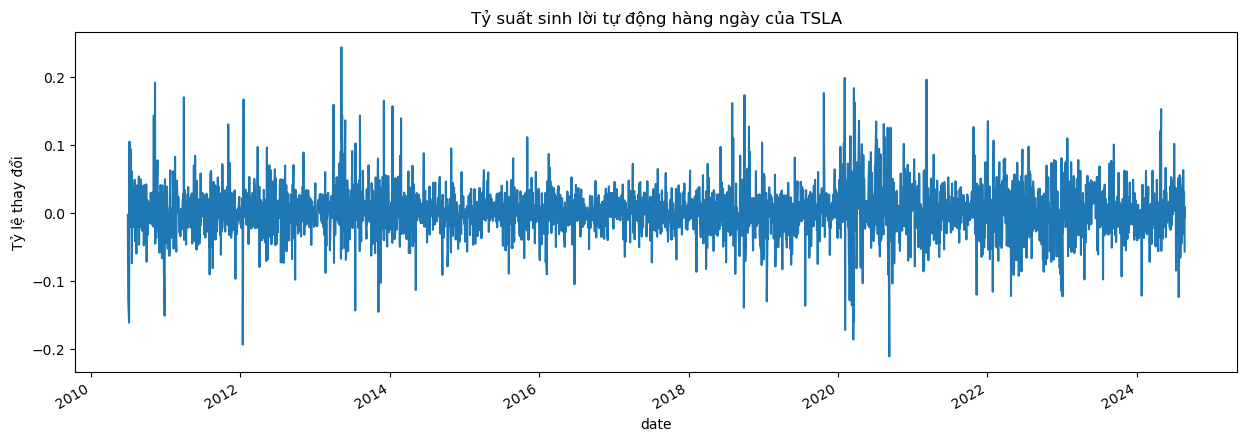


 5 dòng cuối các cột SMA:
                  open        high         low       close   adj close  \
date                                                                     
2024-08-16  211.149994  219.800003  210.800003  216.119995  216.119995   
2024-08-19  217.070007  222.979996  214.089996  222.720001  222.720001   
2024-08-20  224.880005  228.220001  219.559998  221.100006  221.100006   
2024-08-21  222.669998  224.660004  218.860001  223.270004  223.270004   
2024-08-22  223.820007  224.800003  210.320007  210.660004  210.660004   

              volume  daily_return      sma_20   sma_100  
date                                                      
2024-08-16  88765100      0.009246  214.616501  203.1743  
2024-08-19  76435200      0.030539  213.177001  203.2837  
2024-08-20  74001200     -0.007274  211.913001  203.3609  
2024-08-21  70146000      0.009815  212.277001  203.3847  
2024-08-22  79337500     -0.056479  211.797501  203.3382  

 Độ biến động hàng ngày: 0.0359
 Độ biến

In [ ]:
if not df.empty:
    #1. tính tỷ suất sinh lợi hàng ngày
    # sử dụng giá đóng cửa điều chỉnh
    df['daily_return']=df['adj close'].pct_change()
    print("\n 5 dòng đầu cột 'daily_return':")
    print(df.head())
    # trực quan hóa tỷ suất sinh lợi
    plt.figure(figsize=(15,5))
    df['daily_return'].plot(title='Tỷ suất sinh lời tự động hàng ngày của TSLA')
    plt.ylabel('Tỷ lệ thay đổi')
    plt.show()
    #2. tính các đường trung bình động
    df['sma_20']=df['close'].rolling(window=20).mean()
    df['sma_100']=df['close'].rolling(window=200).mean()
    print("\n 5 dòng cuối các cột SMA:")
    print(df.tail())
    #3. tính độ biến động
    volatility=df['daily_return'].std()
    # thường được chuyển thành độ biến động hàng năm
    annual_valatility=volatility*np.sqrt(252) #252 là số ngày giao dịch trung bình trong một năm
    print(f"\n Độ biến động hàng ngày: {volatility:.4f}")
    print(f" Độ biến động hàng năm: {annual_valatility:.4f}") # tức là {annual_volatility*100:.2f}%


## trực quan hóa dữ liệu

'/mnt/data/tsla_analysis_2019_2020.png'

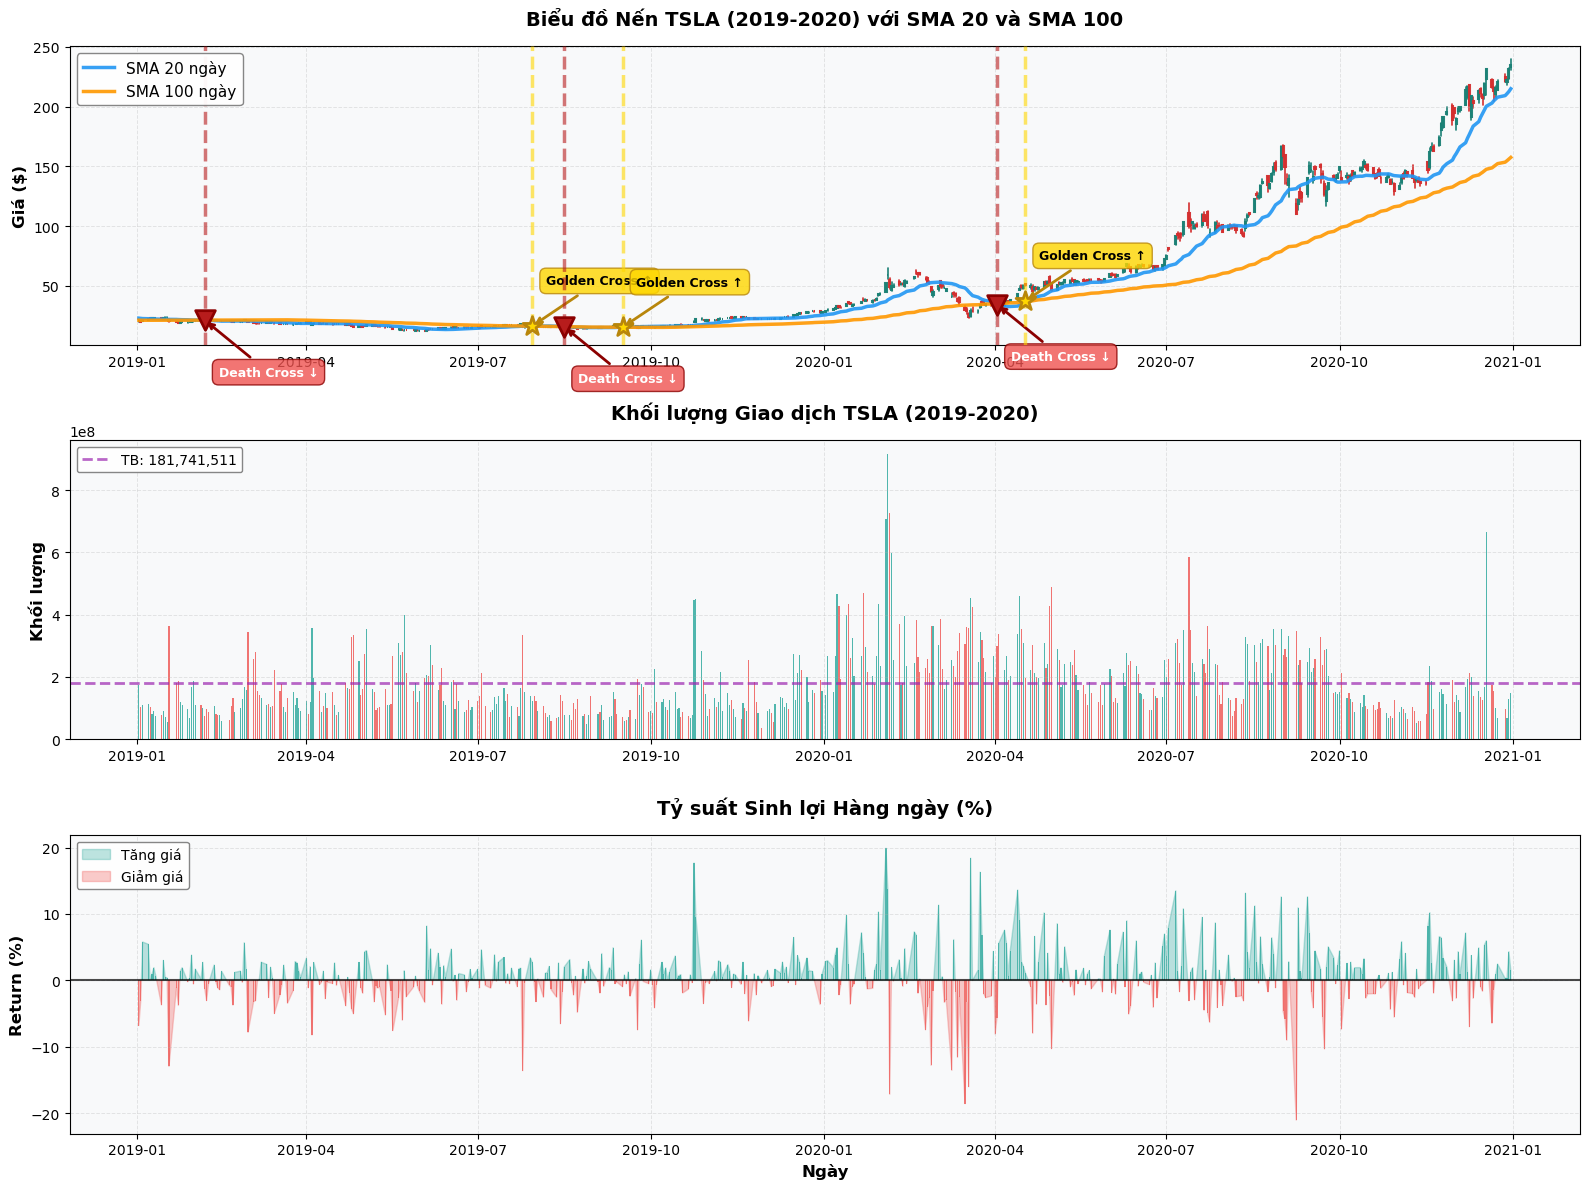

In [ ]:
# Render the user's requested visualization for the uploaded dataset using their styling.
# - Load /mnt/data/TSLA-2.csv
# - Ensure datetime index and presence of OHLCV
# - Compute SMA20/100 and Daily_Return if missing
# - Recreate the exact 3-subplot figure with the user's colors/annotations
# - Save to /mnt/data/tsla_analysis_2019_2020.png

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

path = "TSLA-2.csv"
df = pd.read_csv(path)

# ---------- Helpers ----------
def _norm(s): return re.sub(r'[^a-z0-9]', '', str(s).lower())
def pick(df, candidates):
    for name in candidates:
        if name in df.columns:
            return name
    return None

# Detect date column & set index
date_col = None
for c in df.columns:
    if any(k in _norm(c) for k in ["date","timestamp","datetime","time","tradedate"]):
        date_col = c; break
if date_col is None:
    # try parse ratio
    best, ratio = None, 0.0
    for c in df.columns:
        try:
            r = pd.to_datetime(df[c], errors='coerce').notna().mean()
            if r > ratio:
                best, ratio = c, r
        except: pass
    date_col = best

if date_col is not None:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.dropna(subset=[date_col]).sort_values(date_col).set_index(date_col)
elif not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index, errors='coerce')
    df = df.sort_index()

# Canonical OHLCV
col_open  = pick(df, ["Open","open","OPEN","Opening Price","Open Price"])
col_high  = pick(df, ["High","high","HIGH","Day High","High Price"])
col_low   = pick(df, ["Low","low","LOW","Day Low","Low Price"])
col_close = pick(df, ["Adj Close","AdjClose","Close/Last","Close","close","LAST","Price","price","Close Price"])
col_vol   = pick(df, ["Volume","volume","VOL","Vol","Total Volume"])

# Clean numerics
for c in [col_open, col_high, col_low, col_close, col_vol]:
    if c is not None and c in df.columns:
        df[c] = (df[c].astype(str)
                       .str.replace(r"[\$,]", "", regex=True)
                       .str.replace(r"\s", "", regex=True))
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Ensure required series for plotting
if 'SMA_20' not in df.columns:
    df['SMA_20'] = df[col_close].rolling(20, min_periods=1).mean()
if 'SMA_100' not in df.columns:
    df['SMA_100'] = df[col_close].rolling(100, min_periods=1).mean()
if 'Daily_Return' not in df.columns:
    df['Daily_Return'] = df[col_close].pct_change()

# Filter 2019–2020
df_2019_2020 = df.loc['2019':'2020'].copy()
days = len(df_2019_2020)

# Golden/Death Cross detection
golden_cross = []
death_cross = []
for i in range(1, len(df_2019_2020)):
    if (df_2019_2020['SMA_20'].iloc[i-1] <= df_2019_2020['SMA_100'].iloc[i-1] and
        df_2019_2020['SMA_20'].iloc[i] > df_2019_2020['SMA_100'].iloc[i]):
        golden_cross.append(df_2019_2020.index[i])
    elif (df_2019_2020['SMA_20'].iloc[i-1] >= df_2019_2020['SMA_100'].iloc[i-1] and
          df_2019_2020['SMA_20'].iloc[i] < df_2019_2020['SMA_100'].iloc[i]):
        death_cross.append(df_2019_2020.index[i])

# Figure with 3 subplots
fig = plt.figure(figsize=(16, 12))

# Subplot 1: Candles + SMA (with user colors)
ax1 = plt.subplot(3, 1, 1)
if all(c is not None for c in [col_open, col_high, col_low, col_close]):
    for i in range(len(df_2019_2020)):
        date = df_2019_2020.index[i]
        open_price = df_2019_2020[col_open].iloc[i]
        close_price = df_2019_2020[col_close].iloc[i]
        high_price = df_2019_2020[col_high].iloc[i]
        low_price = df_2019_2020[col_low].iloc[i]

        if close_price >= open_price:
            color_body = '#26A69A'; color_edge = '#1B8075'; color_wick = '#1B8075'
        else:
            color_body = '#EF5350'; color_edge = '#D32F2F'; color_wick = '#D32F2F'

        ax1.plot([date, date], [low_price, high_price],
                 color=color_wick, linewidth=1.2, solid_capstyle='round', zorder=1)

        height = abs(close_price - open_price)
        bottom = min(open_price, close_price)
        if height == 0:
            height = 0.02
        ax1.bar(date, height, bottom=bottom, width=0.6,
                color=color_body, edgecolor=color_edge, linewidth=1.5, alpha=0.95, zorder=2)
else:
    # Fallback: simple close line if OHLC incomplete
    ax1.plot(df_2019_2020.index, df_2019_2020[col_close], linewidth=1.5)

ax1.plot(df_2019_2020.index, df_2019_2020['SMA_20'], label='SMA 20 ngày',
         color='#2196F3', linewidth=2.5, alpha=0.9, linestyle='-', zorder=3)
ax1.plot(df_2019_2020.index, df_2019_2020['SMA_100'], label='SMA 100 ngày',
         color='#FF9800', linewidth=2.5, alpha=0.9, linestyle='-', zorder=3)

# Markers & annotations
for gc in golden_cross:
    ax1.axvline(x=gc, color='#FFD700', linestyle='--', alpha=0.6, linewidth=2.5, zorder=4)
    gc_idx = df_2019_2020.index.get_loc(gc)
    gc_price = df_2019_2020['SMA_20'].iloc[gc_idx]
    ax1.scatter(gc, gc_price, color='#FFD700', s=200, marker='*',
                edgecolors='darkgoldenrod', linewidths=2, zorder=5, label='_nolegend_')
    ax1.annotate('Golden Cross ↑', xy=(gc, gc_price),
                 xytext=(10, 30), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFD700', alpha=0.8, edgecolor='darkgoldenrod'),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='darkgoldenrod', lw=2),
                 fontsize=9, fontweight='bold', color='black')
for dc in death_cross:
    ax1.axvline(x=dc, color='#B71C1C', linestyle='--', alpha=0.6, linewidth=2.5, zorder=4)
    dc_idx = df_2019_2020.index.get_loc(dc)
    dc_price = df_2019_2020['SMA_20'].iloc[dc_idx]
    ax1.scatter(dc, dc_price, color='#B71C1C', s=200, marker='v',
                edgecolors='darkred', linewidths=2, zorder=5, label='_nolegend_')
    ax1.annotate('Death Cross ↓', xy=(dc, dc_price),
                 xytext=(10, -40), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='#EF5350', alpha=0.8, edgecolor='darkred'),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='darkred', lw=2),
                 fontsize=9, fontweight='bold', color='white')

ax1.set_title('Biểu đồ Nến TSLA (2019-2020) với SMA 20 và SMA 100',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Giá ($)', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left', fontsize=11, framealpha=0.95, edgecolor='gray', fancybox=True)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax1.set_facecolor('#F8F9FA')

# Subplot 2: Volume
ax2 = plt.subplot(3, 1, 2)
if all(c is not None for c in [col_open, col_close]) and (col_vol is not None):
    volume_colors = ['#26A69A' if df_2019_2020[col_close].iloc[i] >= df_2019_2020[col_open].iloc[i]
                     else '#EF5350' for i in range(len(df_2019_2020))]
    ax2.bar(df_2019_2020.index, df_2019_2020[col_vol],
            color=volume_colors, alpha=0.8, width=0.6, edgecolor='none')
else:
    if col_vol is not None:
        ax2.bar(df_2019_2020.index, df_2019_2020[col_vol], alpha=0.8, width=0.6, edgecolor='none')
ax2.set_title('Khối lượng Giao dịch TSLA (2019-2020)', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylabel('Khối lượng', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax2.set_facecolor('#F8F9FA')
if col_vol is not None:
    avg_volume = df_2019_2020[col_vol].mean()
    ax2.axhline(y=avg_volume, color='#9C27B0', linestyle='--', linewidth=2,
                alpha=0.7, label=f'TB: {avg_volume:,.0f}')
    ax2.legend(loc='upper left', fontsize=10, framealpha=0.95, edgecolor='gray', fancybox=True)

# Subplot 3: Daily returns
ax3 = plt.subplot(3, 1, 3)
returns_percent = df_2019_2020['Daily_Return'] * 100
colors_returns = ['#26A69A' if r >= 0 else '#EF5350' for r in returns_percent.fillna(0).to_numpy()]
ax3.bar(df_2019_2020.index, returns_percent, color=colors_returns,
        alpha=0.7, width=0.6, edgecolor='none')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.7)

# Robust fill_between using date2num
x = mdates.date2num(df_2019_2020.index.to_pydatetime())
y = returns_percent.fillna(0).to_numpy()
ax3.fill_between(x, y, 0, where=(y >= 0), alpha=0.3, color='#26A69A', interpolate=True, label='Tăng giá')
ax3.fill_between(x, y, 0, where=(y < 0),  alpha=0.3, color='#EF5350', interpolate=True, label='Giảm giá')

ax3.set_title('Tỷ suất Sinh lợi Hàng ngày (%)', fontsize=14, fontweight='bold', pad=15)
ax3.set_ylabel('Return (%)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Ngày', fontsize=12, fontweight='bold')
ax3.legend(loc='upper left', fontsize=10, framealpha=0.95, edgecolor='gray', fancybox=True)
ax3.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax3.set_facecolor('#F8F9FA')

plt.tight_layout()
outpath = "/mnt/data/tsla_analysis_2019_2020.png"
plt.savefig(outpath, dpi=300, bbox_inches='tight')
outpath


In [ ]:
# đổi tên cột thành chữ thường cho nhất quán
if not df.empty:
 df.columns = [col.lower() for col in df.columns]
 print("\nĐã đổi tên cột thành chữ thường:")
 print(df.columns)


Đã đổi tên cột thành chữ thường:
Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'sma_20',
       'sma_100', 'daily_return'],
      dtype='object')


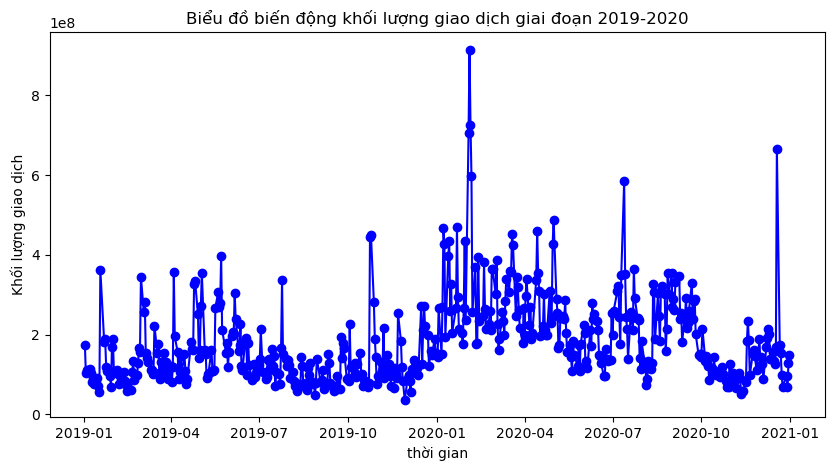

<Figure size 1000x500 with 0 Axes>

In [ ]:
if not df.empty:
    # chỉ vẽ dữ liệu từ 2019-2020 trở đi cho dễ nhìn
    df_plot=df['2019':'2020']
    #1. tạo biểu đồ nến với Plotly
    fig=go.Figure(data=[go.Candlestick(x=df_plot.index,
                                       open=df_plot['open'],
                                       high=df_plot['high'],
                                       low=df_plot['low'],
                                       close=df_plot['close'],
                                       name='TSLA')])
    #2. Thêm các đường trung bình động
    fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot['sma_20'],
                             mode='lines', name='SMA 20', line=dict(color='orange', width=1)))
    fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot['sma_100'],
                             mode='lines', name='SMA 100', line=dict(color='purple', width=1)))
    #tùy chỉnh layout
    fig.update_layout(
        title='Biểu đồ giá cổ phiếu Tesla (TSLA) với SMA 20 và SMA 100',
        yaxis_title='Giá cổ phiếu (USD)',
        xaxis_rangeslider_visible=False # ẩn thanh trượt dải x mặc định
    )
    fig.show()

    # vẽ biểu đồ đường thể hiện sự biến động khối lượng giao dịch
    #volume=df_plot['volume']
    plt.figure(figsize=(10,5))
    plt.plot(df_plot.index, df_plot['volume'], marker='o', color='b', linestyle='-')
    plt.title("Biểu đồ biến động khối lượng giao dịch giai đoạn 2019-2020")
    plt.xlabel("thời gian")
    plt.ylabel("Khối lượng giao dịch")
    plt.figure(figsize=(10,5))
    plt.show()


## đánh giá rủi ro và lợi nhuận

In [ ]:
import re
def _norm(s: str) -> str:
    # chuẩn hoá tên cột: chữ thường, bỏ ký tự không phải chữ
    return re.sub(r'[^a-z]', '', str(s).lower())

def find_date_col(df: pd.DataFrame) -> str:
    # 1) ưu tiên các cột chứa từ khoá "date/time/timestamp/datetime/tradedate"
    date_keys = ["date", "time", "timestamp", "datetime", "tradedate"]
    for col in df.columns:
        nc = _norm(col)
        if any(k in nc for k in date_keys):
            return col
    # 2) nếu không có, thử tìm cột có thể parse datetime tỉ lệ cao
    best_col, best_ratio = None, 0.0
    for col in df.columns:
        try:
            parsed = pd.to_datetime(df[col], errors='coerce', utc=False)
            ratio = parsed.notna().mean()
            if ratio > best_ratio:
                best_ratio, best_col = ratio, col
        except Exception:
            pass
    if best_col is not None and best_ratio >= 0.6:  # ngưỡng chấp nhận
        return best_col
    # 3) nếu index là datetime thì dùng index
    if isinstance(df.index, (pd.DatetimeIndex,)):
        return None  # None nghĩa là dùng index datetime
    raise KeyError("Không tìm thấy cột ngày hợp lệ (Date/Time/Timestamp/Datetime...).")

def find_price_col(df: pd.DataFrame) -> str:
    # Ưu tiên Adj Close nếu có
    price_priority = [
        "adjclose", "adjustedclose", "adjcloseprice", "adjustedcloseprice",
        "close/last", "closelast", "closeprice", "closingprice",
        "close", "last", "price"
    ]
    # quét theo ưu tiên
    nc_map = {_norm(c): c for c in df.columns}
    for key in price_priority:
        if key in nc_map:
            return nc_map[key]
    # fallback: tìm cột có tên chứa "close" hoặc "price"
    for c in df.columns:
        nc = _norm(c)
        if "close" in nc or "price" in nc or "last" in nc:
            return c
    raise KeyError("Không tìm thấy cột giá (ví dụ: Adj Close/Close/Price...).")

# --- TÌM CỘT NGÀY & GIÁ ---
date_col = find_date_col(df)
price_col = find_price_col(df)

print("Cột ngày nhận diện:", "index (DatetimeIndex)" if date_col is None else date_col)
print("Cột giá nhận diện:", price_col)

# Chuẩn hoá cột ngày (nếu có) và sắp xếp theo thời gian tăng dần
if date_col is not None:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.dropna(subset=[date_col]).sort_values(date_col)
    df = df.set_index(date_col)
else:
    # date ở index, đảm bảo là DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors='coerce')
        df = df.dropna(axis=0, subset=[df.index.name]).sort_index()

# Đảm bảo giá là numeric (xử lý trường hợp có ký hiệu $ hoặc dấu phẩy)
df[price_col] = (
    df[price_col]
      .astype(str)
      .str.replace(r"[\$,]", "", regex=True)
      .astype(float)
)

# 1) Daily returns
df['Daily_Return'] = df[price_col].pct_change()

# Bỏ NaN đầu tiên và các outlier/NaN bất thường (nếu có)
returns = df['Daily_Return'].dropna()

# Bảo vệ chia cho 0
std_ret = returns.std()
if std_ret == 0 or np.isnan(std_ret):
    raise ValueError("Độ lệch chuẩn của lợi nhuận bằng 0/NaN – không thể tính Sharpe.")

# 1️⃣ mean daily return
mean_ret = returns.mean()
# 2️⃣ std daily return
# (đã tính std_ret ở trên)
# 3️⃣ Sharpe daily
sharpe_daily = mean_ret / std_ret
# 4️⃣ Annualized Sharpe (√252)
sharpe_annual = sharpe_daily * np.sqrt(252)

print(f"Lợi nhuận trung bình hàng ngày: {mean_ret:.8f}")
print(f"Độ lệch chuẩn hàng ngày:      {std_ret:.8f}")
print(f"Sharpe Ratio hàng ngày:       {sharpe_daily:.4f}")
print(f"Sharpe Ratio hàng năm:        {sharpe_annual:.4f}")

Cột ngày nhận diện: open
Cột giá nhận diện: adj close
Lợi nhuận trung bình hàng ngày: 0.00286060
Độ lệch chuẩn hàng ngày:      0.05221101
Sharpe Ratio hàng ngày:       0.0548
Sharpe Ratio hàng năm:        0.8698


## Dự đoán giá cổ phiếu

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
if not df.empty:
    #1. chuẩn bị dữ liệu
    # dự đoán giá đóng cửa
    # sử dụng dữ liệu từ năm 2018 để mô hình không quá cồng kềnh
    ts_data=df['close']['2018':].asfreq('B') #'B' là tần suất ngày làm việc
    ts_data=ts_data.fillna(method='ffill') #điền các ngày nghỉ
    #2. xây dựng mô hình ARIMA
    # việc chọn (p,d,q) là một quá trình phức tạp, ở đây chúng ta sẽ chọn bộ tham số đơn giản (5,1,0)
    #p=5: phụ thuộc vào 5 ngày trước
    #d=1: lấy sai phân bậc 1
    #q=0: không dùng thành phân MA
    model=ARIMA(ts_data, order=(5,1,0))
    model_fit=model.fit()
    print(model_fit.summary())
    #3. dự đoán
    # dự đoán 30 ngày tiếp theo
    forecast_result=model_fit.get_forecast(steps=30)
    forecast=forecast_result.predicted_mean
    confidence_intervals=forecast_result.conf_int()
    #4. trực quan hóa kết quả
    plt.figure(figsize=(15,7))
    plt.plot(ts_data['2021':], label='Giá thực tế')
    plt.plot(forecast, label='Giá dự đoán', color='red')
    plt.fill_between(confidence_intervals.index,
                     confidence_intervals.iloc[:, 0],
                     confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='Khoảng tin cậy 95%')
    plt.title('Dự đoán giá cổ phiếu TSLA 30 ngày tới bằng ARIMA')
    plt.legend()
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_55440\1168286574.py:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

c:\Users\DELL\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\Users\DELL\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning:

invalid value encountered in divide

c:\Users\DELL\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning:

invalid value encountered in scalar divide

c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:534: RuntimeWarning:

invalid value encountered in scalar divide



LinAlgError: Schur decomposition solver error.